## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [11]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
#def build_mlp():
"""
Build your own model
"""
from keras.models import Sequential
from keras.layers import Dense, Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],drp_ratio=0.2):
    
    model = Sequential()
    model.add(Dense(units = input_shape[1] ,input_dim = input_shape[1], kernel_initializer = 'normal', activation = 'relu',name = 'input'))
    
    for i, n_units in enumerate(num_neurons):
        model.add(Dense(units=n_units, kernel_initializer='normal', activation='relu',name="hidden_layer"+str(i+1)))  
        model.add(Dropout(drp_ratio))  #有別範例 另一寫法  
                
    model.add(Dense(units=output_units,kernel_initializer='normal', activation='softmax',name='output'))

    return(model)

## 不同 Dropout rate 對訓練的效果

In [22]:
## 超參數設定
"""
Set Hyper-parameters here
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2,0.4]

In [23]:
#results = {}
"""
Write your training loop and record results
"""
results = {}
for drp_rate in Dropout_EXP :
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape, drp_ratio=drp_rate)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drp_rate-%s" % str(drp_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 46s 915us/step - loss: 1.6476 - acc: 0.4100 - val_loss: 1.5490 - val_acc: 0.4501
Epoch 18/20
50000/50000 [==============================] - 46s 912us/step - loss: 1.6338 - acc: 0.4158 - val_loss: 1.5395 - val_acc: 0.4562
Epoch 19/20
50000/50000 [==============================] - 45s 910us/step - loss: 1.6221 - acc: 0.4183 - val_loss: 1.5390 - val_acc: 0.4543
Epoch 20/20
50000/50000 [==============================] - 46s 915us/step - loss: 1.6099 - acc: 0.4244 - val_loss: 1.5272 - val_acc: 0.4557


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Plot results
"""

def plot_model_score(results):
    color_bar = ["r", "g", "b", "y", "m", "k"] 
    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()


    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

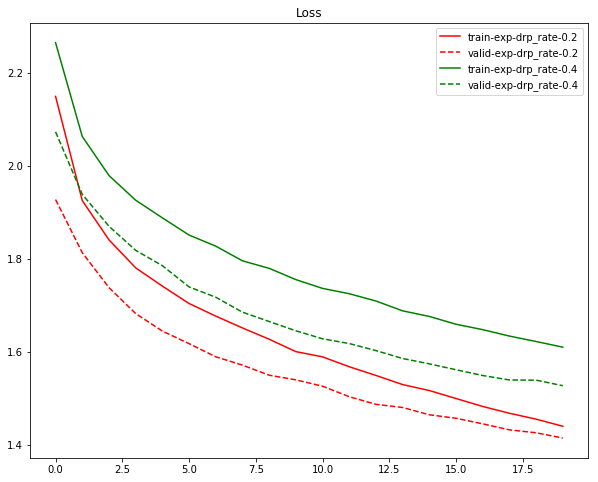

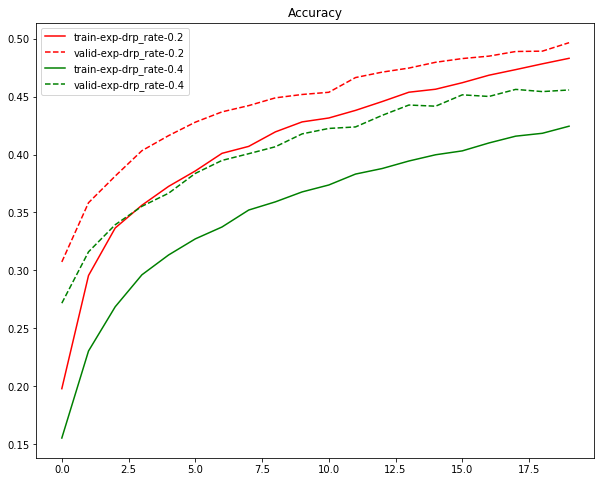

In [25]:
plot_model_score(results)

## 增加不同層數

In [26]:
results = {}
for drp_rate in Dropout_EXP :
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape, drp_ratio=drp_rate,num_neurons=[512, 256, 128, 64, 32])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drp_rate-%s" % str(drp_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 47s 939us/step - loss: 2.1073 - acc: 0.1880 - val_loss: 2.0665 - val_acc: 0.2025
Epoch 12/20
50000/50000 [==============================] - 46s 922us/step - loss: 2.0922 - acc: 0.1920 - val_loss: 2.0499 - val_acc: 0.2016
Epoch 13/20
50000/50000 [==============================] - 46s 912us/step - loss: 2.0809 - acc: 0.1896 - val_loss: 2.0337 - val_acc: 0.1948
Epoch 14/20
50000/50000 [==============================] - 45s 906us/step - loss: 2.0635 - acc: 0.1950 - val_loss: 2.0164 - val_acc: 0.2050
Epoch 15/20
50000/50000 [==============================] - 45s 909us/step - loss: 2.0479 - acc: 0.1957 - val_loss: 1.9992 - val_acc: 0.2081
Epoch 16/20
50000/50000 [==============================] - 45s 907us/step - loss: 2.0359 - acc: 0.2030 - val_loss: 1.9825 - val_acc: 0.2231
Epoch 17/20
50000/50000 [==============================] - 46s 916us/step - loss: 2.0223 - acc: 0.2094 - val_loss: 1.9576 - val_acc: 0.2479
Epoch 18/20
50000/50000 [=======

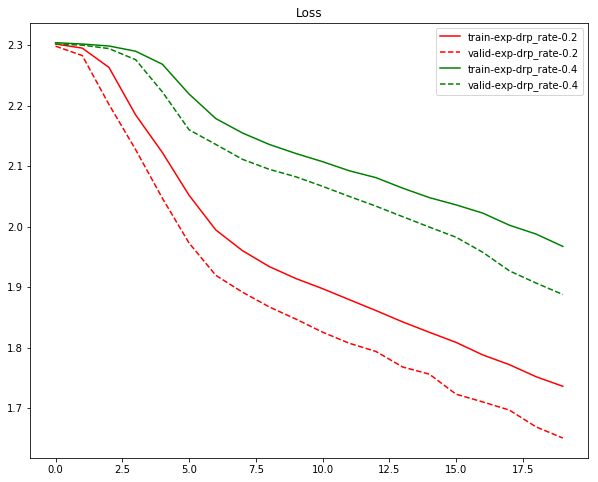

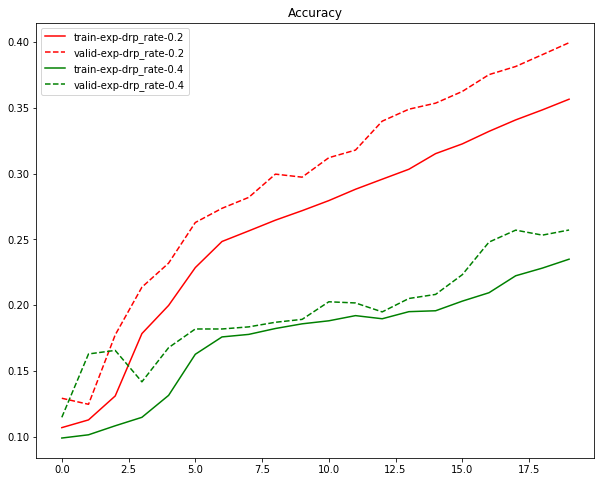

In [27]:
plot_model_score(results)

## 優化器換成 adam

In [28]:
results = {}
for drp_rate in Dropout_EXP :
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape, drp_ratio=drp_rate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drp_rate-%s" % str(drp_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 64s 1ms/step - loss: 1.3912 - acc: 0.5055 - val_loss: 1.4246 - val_acc: 0.4962
Epoch 20/20
50000/50000 [==============================] - 65s 1ms/step - loss: 1.3733 - acc: 0.5101 - val_loss: 1.3876 - val_acc: 0.5067


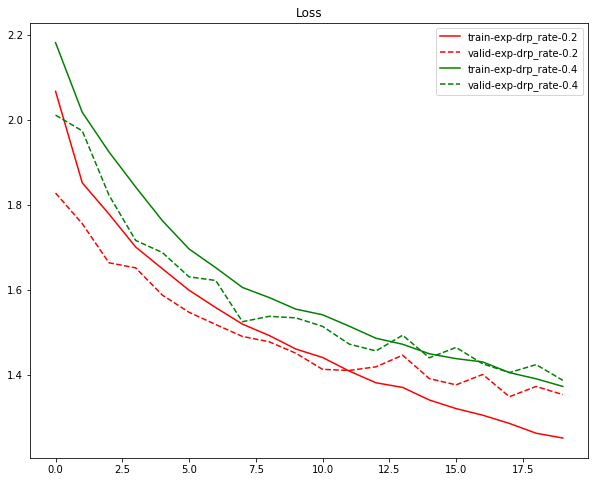

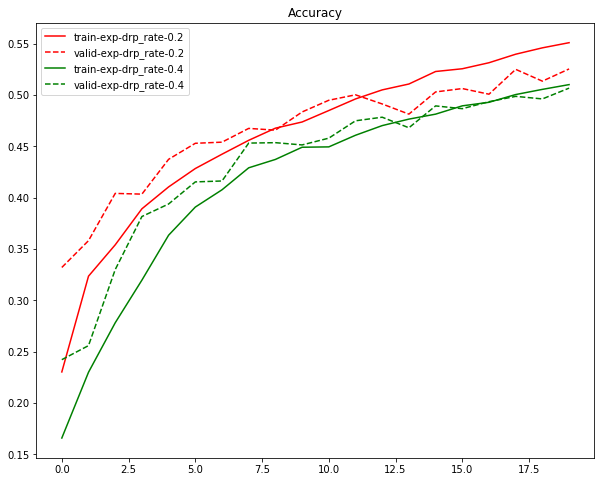

In [29]:
plot_model_score(results)